# The Sparks foundation #December22
   
    DATA SCIENCE AND BUSINESS ANALYTICS INTERN
    
    **AUTHOR:ANIMESH DAS**
    
    TASK 1:Prediction using Supervised ML.
    
    OBJECTIVE: We have to predict the percentage score of a student based on the number of hours studied.The task has two        variables i.e the no. of hours studied and the target value is the percentage score.
    This is solved using Linear Regression.

In [54]:
# import warning

In [55]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the data 


In [8]:
data=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Description of the data

In [10]:
data.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [12]:
# it showws the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [14]:
# Shape of the data
print(data.shape)

(25, 2)


# scatter plot

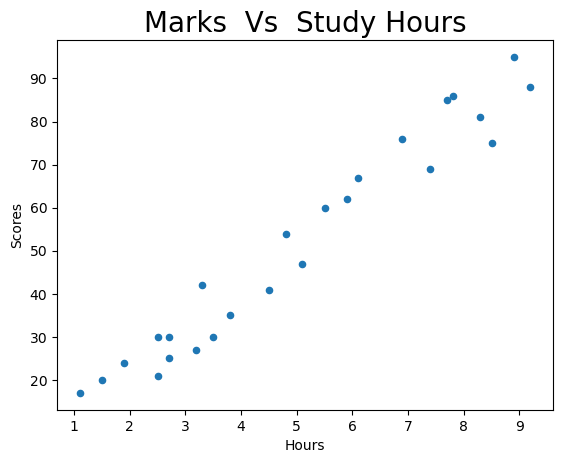

In [16]:
data.plot(kind='scatter',x='Hours',y='Scores');
plt.title('Marks  Vs  Study Hours',size=20)
plt.show()

# Calculating the correlation coefficient

In [18]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [20]:
# The variables are positively and strongly correlated as the value of correlation coefficient is close to one.

In [22]:
#Regression plot

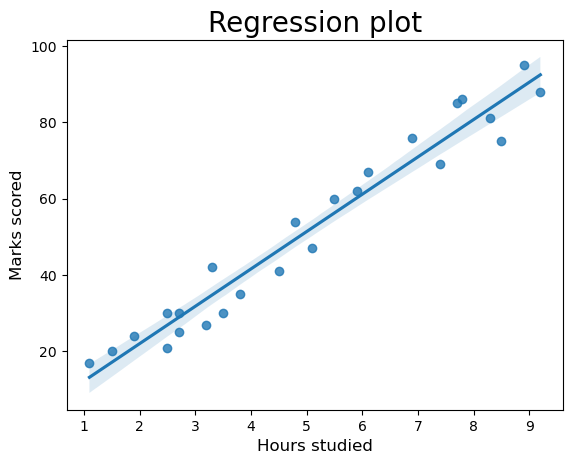

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [24]:
sns.regplot(x=data['Hours'],y=data['Scores'])
plt.title('Regression plot',size=20)
plt.xlabel('Hours studied',size=12)
plt.ylabel('Marks scored',size=12)
plt.show()
print(data.corr())

## It is confirmed that the variables are positively correlated.

### Training the model
### Splitting the data

In [26]:
x=data.drop(["Scores"],axis=1)
y=data["Scores"]

In [28]:
x

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [30]:
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [32]:
# importing train_test_split method

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=0)

In [38]:
# Model training

In [40]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()
clf.fit(x_train,y_train)

LinearRegression()

In [42]:
print(clf.coef_,clf.intercept_)

[9.91065648] 2.018160041434662


In [44]:
## visual representation of the model

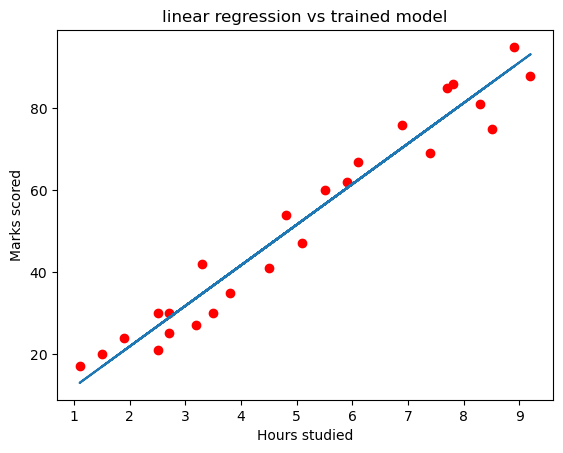

In [46]:
line=clf.coef_*x+clf.intercept_
plt.title('linear regression vs trained model')
plt.scatter(x,y,color='red')
plt.xlabel('Hours studied')
plt.ylabel('Marks scored')
plt.plot(x,line)
plt.show()

In [48]:
print(x_test)
pred_y=clf.predict(x_test)


    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


## Comparing the actual value to the predicted value

In [50]:
df=pd.DataFrame({'Actual value':y_test,'Predicted value':pred_y})
df

,Actual value,Predicted value
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [51]:
# checking the acccuracy of train and test data

In [52]:
print("Training Score",clf.score(x_train,y_train))
print("Testing Score",clf.score(x_test,y_test))

Training Score 0.9515510725211552
Testing Score 0.9454906892105354


# predicting the score for 9.25 hours 

In [56]:
hours=[9.25]
test=np.array(['hours'])
test=test.reshape(-1,1)
pred=clf.predict([[9.25]])
print("No. of hours = {}".format(hours))
print("Predicted score ={}".format(pred[0]))


No. of hours = [9.25]
Predicted score =93.69173248737539


# The predicted score of a student studying for 9.25 hours is 93.69173....

In [57]:
### checking the efficiency of the model 

In [59]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mean_square_error=mean_squared_error(y_test,pred_y[:5])
mean_abs_error=mean_absolute_error(y_test,pred_y[:5])
print("Mean square error=",mean_square_error)
print("Mean_absolute_error",mean_abs_error)

Mean square error= 21.598769307217456
Mean_absolute_error 4.183859899002982
